My name is Miftah Fauzi Januarta, a student of Mechatronics and Artificial Intelligence at UPI Purwakarta.

This notebook presents an exploration of Supervised Learning within the context of predictive modeling. The primary objective is to develop and evaluate a linear regression model aimed at predicting track popularity.
The dataset employed in this project is the “TikTok Songs 2022” dataset, sourced from [Kaggle](https://www.kaggle.com/datasets/sveta151/tiktok-popular-songs-2022/data)
. It contains various attributes describing songs that gained popularity on TikTok during 2022.

This project aims to provide valuable insights for music labels and content creators by identifying the key factors that contribute to a song’s virality on TikTok. By analyzing the relationship between various audio features—such as energy, danceability, and tempo—and their impact on song popularity, the model can help artists and producers make data-driven decisions when creating or promoting music. Furthermore, the system has the potential to evolve into a content-based music recommendation engine, capable of suggesting songs with similar audio characteristics or “vibes,” enhancing user engagement and discovery on music and social media platforms.

# 1. Library and Dataset Initialization

*   List item
*   List item



1.1 Import Dataset

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn import datasets

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv('/content/drive/MyDrive/ML/Dataset/TikTok_songs_2022.csv')
display(df)

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.720000,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.342000,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.350000,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.440000,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.099500,0.000000,0.3350,0.722,108.966,4,191822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,The Less I Know The Better,Tame Impala,78,Currents,84,0.640,0.740,-4.083,1,4,0.0284,0.011500,0.006780,0.1670,0.785,116.879,4,216320
259,Dandelions,Ruth B.,75,Safe Haven,90,0.609,0.692,-2.958,1,1,0.0259,0.015700,0.000000,0.0864,0.454,116.959,3,233720
260,Jimmy Cooks (feat. 21 Savage),Drake,95,"Honestly, Nevermind",92,0.529,0.673,-4.711,1,0,0.1750,0.000307,0.000002,0.0930,0.366,165.921,4,218365
261,Good Looking,Suki Waterhouse,64,Good Looking,80,0.377,0.558,-9.076,1,4,0.0299,0.078900,0.000342,0.1250,0.267,149.971,3,214800


# 2. Data Cleaning & Preprocessing

---



2.1 Checking Data Structure

In [8]:
#Checking missing values
df.isnull().sum()

,0
track_name,0
artist_name,0
artist_pop,0
album,0
track_pop,0
danceability,0
energy,0
loudness,0
mode,0
key,0


In [9]:
df.shape

(263, 18)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

*Note : If a feature in the dataset has the object data type, it means the values are categorical or text rather than numeric. To decide whether such a feature can be used in a linear regression model, we usually look at the number of unique values (cardinality). As a rule of thumb: if the number of unique values is small (for example, less than 50), the feature can still be encoded into numbers and used in the model. However, if the cardinality is very high (say, more than 100), especially when the dataset itself is relatively small, it is better to drop the feature. Encoding it would create too many additional columns, making the model harder to train and less effective.

2.2 Feature Elimination

In [11]:
df['track_name'].nunique()

258

In [12]:
df['artist_name'].nunique()

199

In [13]:
df['album'].nunique()

251

In the case of this TikTok songs dataset, the features `track_name`, `artist_name`, and `album` all have the **object** data type, meaning they contain categorical or text values instead of numerical ones. When we look at their uniqueness, the `track_name` feature has **258 unique values**, `artist_name` has **199 unique values**, and `album` has **251 unique values**, out of a total of only 263 rows in the dataset. This indicates extremely high cardinality, where nearly every entry is unique. Including such features in a linear regression model would require encoding them into a large number of additional columns, which is inefficient and unlikely to provide meaningful predictive power. Therefore, it is better to drop these features so the model can focus on numeric attributes such as `duration_ms`, `valence`, or `artist_pop`,etc which are more relevant and stable as predictors.


In [14]:
df = df.drop(['track_name', 'artist_name', 'album'], axis=1)
display(df.head())

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,81,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,91,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,73,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,80,89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,81,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


2.3 Analitics Description

In [15]:
#Descriptive Analitics
df.describe()

,artist_pop,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,64.186312,59.844106,0.715338,0.682631,-6.300513,0.536122,5.809886,0.117268,0.193188,0.020244,0.202562,0.506149,122.883696,3.969582,174656.212928
std,18.146338,24.976524,0.117722,0.141756,1.905114,0.499644,3.657312,0.101417,0.214588,0.109370,0.151808,0.220757,24.396686,0.288168,34785.125564
min,18.000000,0.000000,0.308000,0.214000,-13.468000,0.000000,0.000000,0.025200,0.000038,0.000000,0.026500,0.036300,62.948000,1.000000,85742.000000
25%,50.000000,47.000000,0.646000,0.593000,-7.423500,0.000000,2.000000,0.044750,0.028100,0.000000,0.094350,0.349000,106.850500,4.000000,148646.000000
50%,64.000000,66.000000,0.726000,0.701000,-6.067000,1.000000,6.000000,0.070700,0.120000,0.000003,0.132000,0.485000,123.056000,4.000000,171028.000000
75%,81.000000,79.500000,0.796500,0.790500,-4.887000,1.000000,9.000000,0.156000,0.298500,0.000334,0.277500,0.680000,130.004500,4.000000,199047.000000
max,95.000000,97.000000,0.961000,0.955000,-2.634000,1.000000,11.000000,0.481000,0.965000,0.939000,0.790000,0.956000,187.906000,5.000000,298933.000000


# 3. Exploratory Data Analysis

3.1 Correlation Matrix

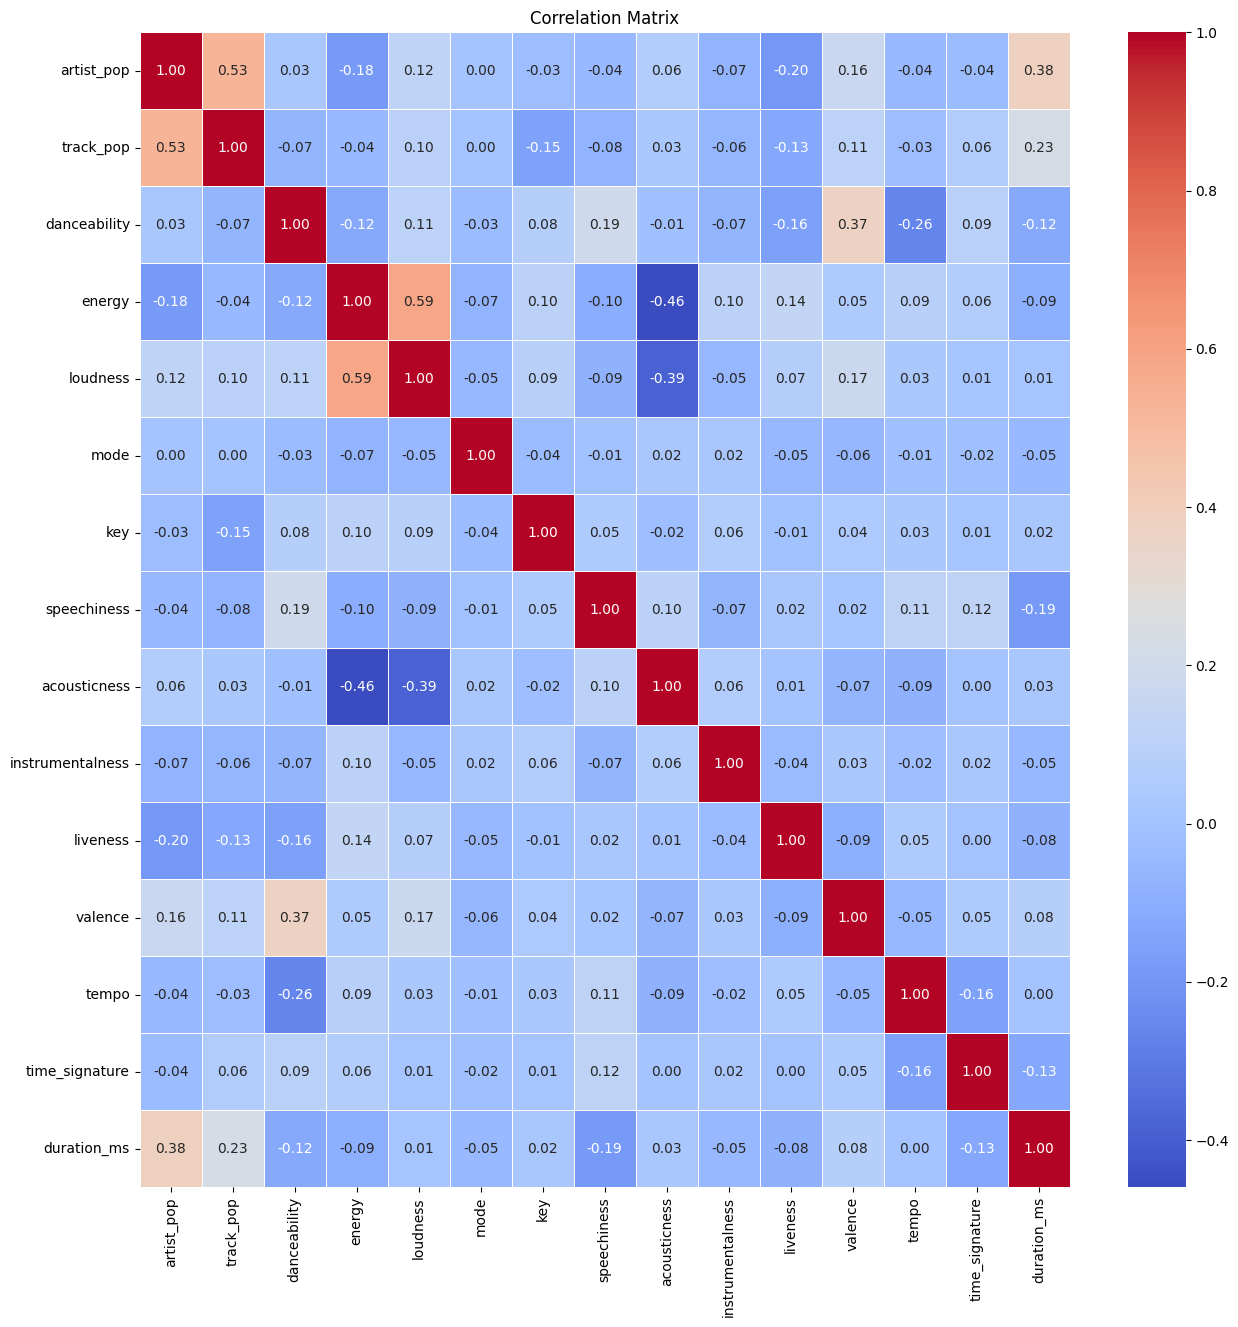

In [16]:
#Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

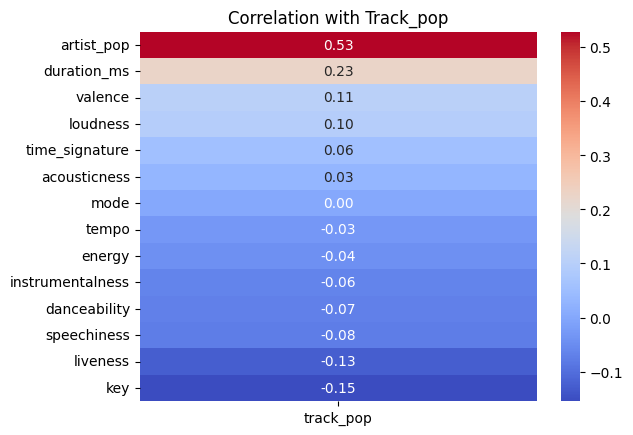

In [17]:
corr = df.corr()
target_corr = corr['track_pop'].drop('track_pop')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Track_pop')
plt.show()

Based on the correlation results with the target track_pop, not all features in the dataset are suitable to be used as predictors. The feature artist_pop has the highest correlation (0.53), making it the main candidate since it shows a strong statistical relationship and, from a domain perspective, it is logical that **the more popular an artist is, the more popular their songs tend to be**. The feature duration_ms is also considered, even though its correlation is lower (0.23), because **the duration of a song can influence its appeal to listeners, even if the effect is relatively small**. Meanwhile, valence (0.11) indicates **the “positive/cheerful” mood of a track, which can be linked to its popularity**, and loudness (0.10) represents **the audio level, which may have a slight impact on listener attraction, though not highly significant**. Therefore, these four attributes are the most appropriate to be used as predictor variables in a linear regression model, both for single and multiple regression scenarios, compared to other features with very low or negative correlations. Hence, these four attributes are suitable to serve as predictor attributes.

3.2 Feature Selection


In [20]:
columns_to_keep = ['track_pop', 'artist_pop', 'duration_ms', 'valence', 'loudness']
df = df[columns_to_keep]
display(df.head())

,track_pop,artist_pop,duration_ms,valence,loudness
0,95,81,298933,0.197,-13.123
1,96,91,167303,0.662,-5.338
2,44,73,163026,0.841,-5.110
3,89,80,238805,0.531,-6.900
4,92,81,191822,0.722,-6.305


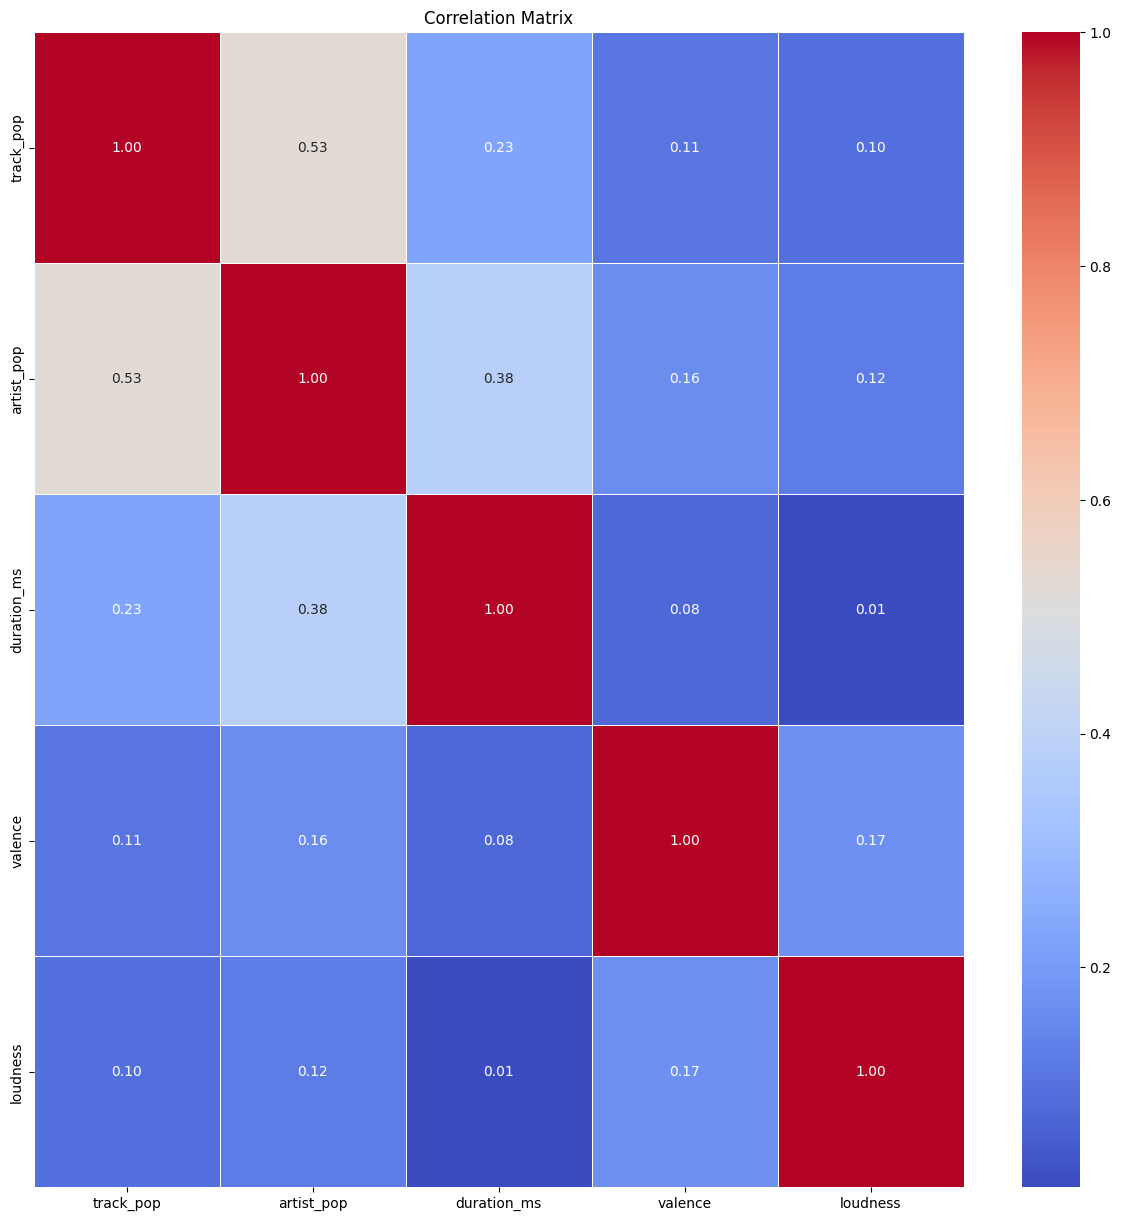

In [21]:
#Correlation Matrix
correlation_matrix = df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidth=0.5,fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

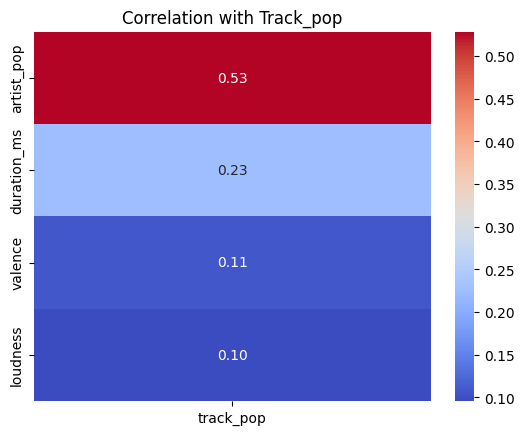

In [22]:
corr = df.corr()
target_corr = corr['track_pop'].drop('track_pop')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.heatmap(target_corr_sorted.to_frame(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation with Track_pop')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the features to standardize
features_to_standardize = ['artist_pop', 'duration_ms', 'valence', 'loudness']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df[features_to_standardize] = scaler.fit_transform(df[features_to_standardize])

display(df.head())

,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,0.928328,Hounds Of Love,95,0.629,0.547,-3.587972,0,10,0.0550,0.7200,0.003140,0.0604,-1.403074,108.375,4,3.579511
1,As It Was,Harry Styles,1.480454,As It Was,96,0.520,0.731,0.506189,0,6,0.0557,0.3420,0.001010,0.3110,0.707330,173.930,4,-0.211793
2,Sunroof,Nicky Youre,0.486627,Sunroof,44,0.768,0.716,0.626096,1,10,0.0404,0.3500,0.000000,0.1500,1.519723,131.430,4,-0.334982
3,Heat Waves,Glass Animals,0.873115,Dreamland (+ Bonus Levels),89,0.761,0.525,-0.315272,1,11,0.0944,0.4400,0.000007,0.0921,0.112786,80.870,4,1.847660
4,About Damn Time,Lizzo,0.928328,About Damn Time,92,0.836,0.743,-0.002360,0,10,0.0656,0.0995,0.000000,0.3350,0.979640,108.966,4,0.494422


In [ ]:
columns_to_keep = ['track_pop', 'artist_pop', 'duration_ms', 'valence', 'loudness']
df = df[columns_to_keep]
display(df.head())

,track_pop,artist_pop,duration_ms,valence,loudness
0,95,0.928328,3.579511,-1.403074,-3.587972
1,96,1.480454,-0.211793,0.707330,0.506189
2,44,0.486627,-0.334982,1.519723,0.626096
3,89,0.873115,1.847660,0.112786,-0.315272
4,92,0.928328,0.494422,0.979640,-0.002360


3.2 Define Outliers from Track_Pop

Before using predictor attributes, it is important to perform data cleaning so that outliers do not affect the quality of training, evaluation, and prediction of the model. Outliers can bias the regression line, reduce the reliability of evaluation metrics such as R², and lead to inaccurate predictions. By identifying and treating outliers first—either by removing them or applying transformations—the regression model becomes more stable, generalizes better to unseen data, and produces more reliable predictions.

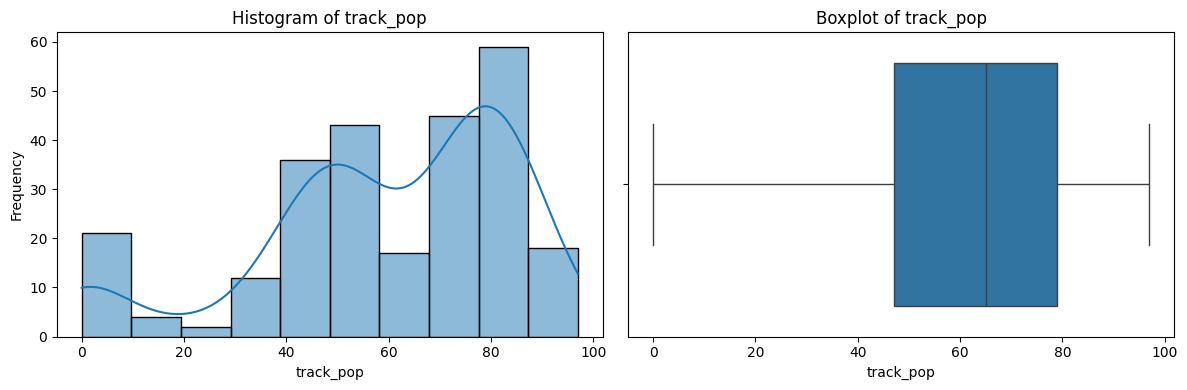

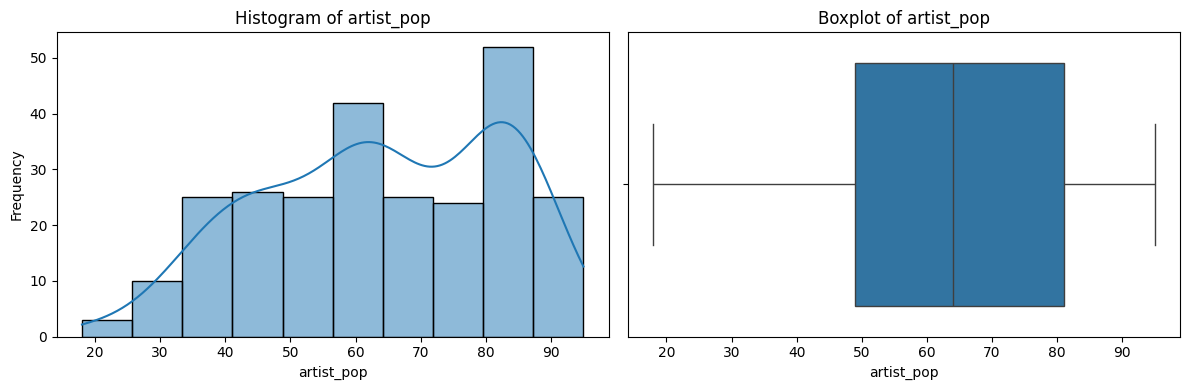

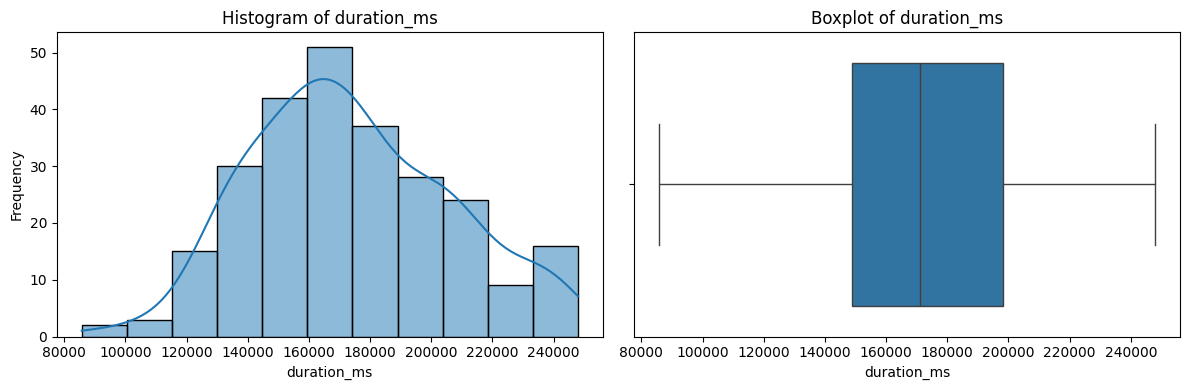

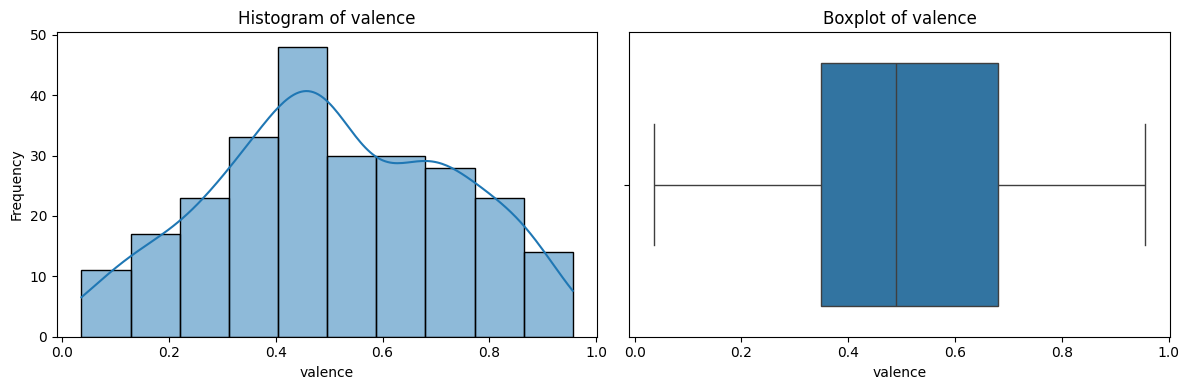

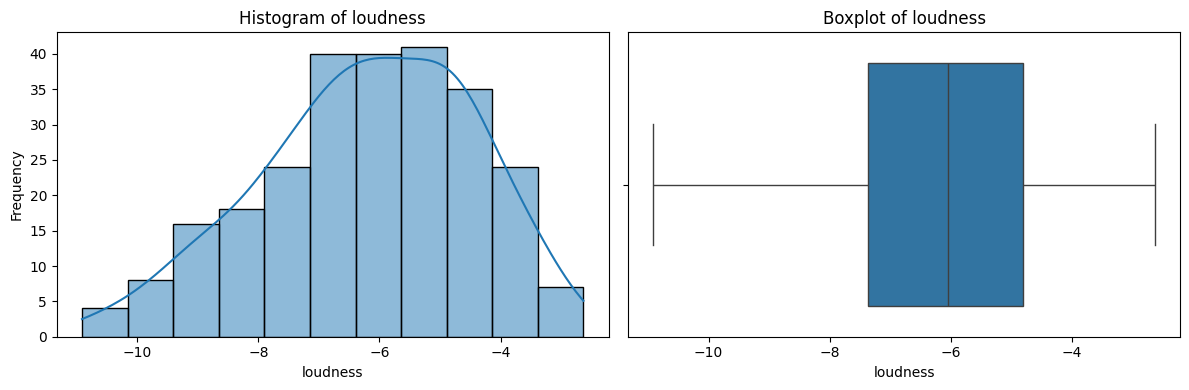

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for visualization
numeric_cols = df.select_dtypes(include=np.number).columns

# Determine the number of rows and columns for subplots
n_cols = 3
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols # Calculate rows needed

for i, col in enumerate(numeric_cols):
    plt.figure(figsize=(12, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [24]:
# Function to remove outliers using IQR (re-defining for clarity in this cell)
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()
    return df_cleaned

# Get all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

df_cleaned = df.copy()

# Remove outliers from each numeric column
for col in numeric_cols:
    df_cleaned = remove_outliers_iqr(df_cleaned, col)

print(f"Original shape: {df.shape}")
print(f"Shape after removing outliers from all numeric features: {df_cleaned.shape}")

# Update the original dataframe with the cleaned data
df = df_cleaned

Original shape: (263, 5)
Shape after removing outliers from all numeric features: (257, 5)


Based on the boxplot for loudness, there are some data points that fall outside the whiskers on the left side of the plot. These points represent songs with significantly lower loudness values than the majority of the data, indicating the presence of outliers in the loudness feature.

# 4.  Data Splitting

In [46]:
from sklearn.model_selection import train_test_split

# Assuming X and y are already defined from previous steps
# X = df[['artist_pop', 'duration_ms', 'valence']]
# y = df['track_pop']

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Using random_state for reproducibility

print("Shape of training features (x_train):", x_train.shape)
print("Shape of testing features (x_test):", x_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

Shape of training features (x_train): (210, 3)
Shape of testing features (x_test): (53, 3)
Shape of training target (y_train): (210,)
Shape of testing target (y_test): (53,)


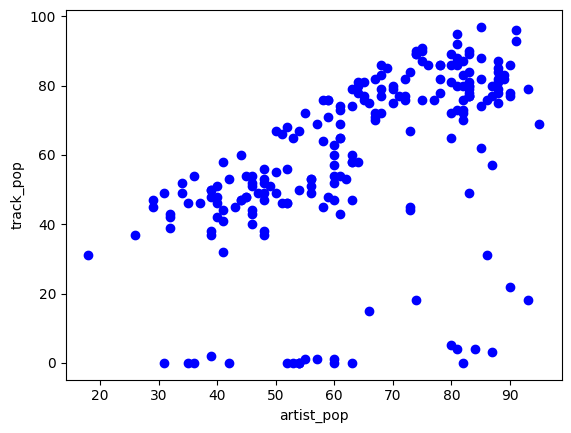

In [47]:
plt.scatter(train.artist_pop, train.track_pop,  color='blue')
plt.xlabel("artist_pop")
plt.ylabel("track_pop")
plt.show()

# 5. Modeling

In [27]:
import statsmodels.api as sm

# Assuming you have already defined X and y
# X should contain your features (predictor variables)
# y should contain your target variable ('track_pop')

# Add a constant to the predictor variables for the intercept
X = sm.add_constant(X)

# Fit the OLS model
model_sm = sm.OLS(y, X).fit()

# Get the p-values
p_values = model_sm.pvalues

# Sort the p-values in descending order (highest to lowest)
p_values_sorted = p_values.sort_values(ascending=False)

# Display the sorted p-values
print("Sorted P-values (Highest to Lowest):")
display(p_values_sorted)

Sorted P-values (Highest to Lowest):


,0
valence,7.802154e-01
duration_ms,6.122279e-01
loudness,5.690588e-01
const,1.637204e-01
artist_pop,1.738768e-16


Dari analisis p-value ini, hanya fitur artist_pop yang menunjukkan signifikansi statistik yang kuat dalam memprediksi track_pop ketika semua fitur ini digunakan bersama dalam model regresi linier. Fitur valence, duration_ms, dan loudness tampaknya tidak memberikan kontribusi prediktif yang signifikan dalam model ini.

Ini mendukung temuan korelasi fitur sebelumnya, di mana artist_pop memiliki korelasi tertinggi dengan track_pop.

In [50]:
import pandas as pd
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# --- 1. Load dataset ---
# Assuming df is already loaded and preprocessed from previous steps
# If not, uncomment the line below:
# df = pd.read_csv("/content/drive/MyDrive/ML/Dataset/TikTok_songs_2022.csv")

target = "track_pop"
features = ["artist_pop", "duration_ms", "valence", "loudness"]
results = []

for r in range(1, len(features) + 1):  # mulai dari 1 fitur sampai 6 fitur
    for combo in itertools.combinations(features, r):
        X = df[list(combo)]
        y = df[target]

        # split data train-test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

        # training model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # evaluasi
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))


        results.append({
            "features": combo,
            "r2_score": r2,
            "mae": mae,
            "rmse": rmse
        })
results_df = pd.DataFrame(results).sort_values(by="r2_score", ascending=False).reset_index(drop=True)
display(results_df)

,features,r2_score,mae,rmse
0,"(artist_pop, duration_ms, valence)",0.312432,16.390033,23.121433
1,"(artist_pop, duration_ms)",0.311651,16.421991,23.134560
2,"(artist_pop, valence)",0.310979,16.377586,23.145847
3,"(artist_pop,)",0.310164,16.402995,23.159525
4,"(artist_pop, duration_ms, loudness)",0.300963,16.568204,23.313469
5,"(artist_pop, duration_ms, valence, loudness)",0.300287,16.550449,23.324743
6,"(artist_pop, loudness)",0.299247,16.558372,23.342066
7,"(artist_pop, valence, loudness)",0.298638,16.545639,23.352211
8,"(duration_ms, valence, loudness)",0.120296,21.840648,26.153217
9,"(duration_ms, valence)",0.112686,21.910684,26.266088


In [51]:
display(results_df.head(1))

,features,r2_score,mae,rmse
0,"(artist_pop, duration_ms, valence)",0.312432,16.390033,23.121433


In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

X = df[['artist_pop', 'duration_ms','valence']]
y = df['track_pop']
model = LinearRegression()

# 6. Model Evaluation

In [59]:
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

mae_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_absolute_error')
mae_scores = -mae_scores

mse_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -mse_scores

rmse_scores = np.sqrt(mse_scores)


print("Cross-validation results (5 folds):")
print(f"R² for each fold: {r2_scores}")
print(f"Mean R²: {np.mean(r2_scores):.2f}")
print(f"Std Dev R²: {np.std(r2_scores):.2f}")
print("-" * 30)
print(f"MAE for each fold: {mae_scores}")
print(f"Mean MAE: {np.mean(mae_scores):.2f}")
print(f"Std Dev MAE: {np.std(mae_scores):.2f}")
print("-" * 30)
print(f"MSE for each fold: {mse_scores}")
print(f"Mean MSE: {np.mean(mse_scores):.2f}")
print(f"Std Dev MSE: {np.std(mse_scores):.2f}")
print("-" * 30)
print(f"RMSE for each fold: {rmse_scores}")
print(f"Mean RMSE: {np.mean(rmse_scores):.2f}")
print(f"Std Dev RMSE: {np.std(rmse_scores):.2f}")

Cross-validation results (5 folds):
R² for each fold: [0.31272402 0.15674701 0.20620301 0.40930052 0.11730935]
Mean R²: 0.24
Std Dev R²: 0.11
------------------------------
MAE for each fold: [17.28539086 14.3384335  16.48801999  9.88819332 15.19552926]
Mean MAE: 14.64
Std Dev MAE: 2.58
------------------------------
MSE for each fold: [435.34002964 476.5336998  549.76474736 253.30762236 613.75987601]
Mean MSE: 465.74
Std Dev MSE: 122.59
------------------------------
RMSE for each fold: [20.86480361 21.82965185 23.44706266 15.91564081 24.77417761]
Mean RMSE: 21.37
Std Dev RMSE: 3.04


# 7. Prediction

In [61]:
from sklearn.model_selection import train_test_split

X = df[['artist_pop', 'duration_ms','valence']]
y = df['track_pop']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print("Shape of training features (x_train):", x_train.shape)
print("Shape of testing features (x_test):", x_test.shape)
print("Shape of training target (y_train):", y_train.shape)
print("Shape of testing target (y_test):", y_test.shape)

Shape of training features (x_train): (210, 3)
Shape of testing features (x_test): (53, 3)
Shape of training target (y_train): (210,)
Shape of testing target (y_test): (53,)


In [62]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [63]:
y_pred = model.predict(x_test)

In [64]:
import numpy as np
import pandas as pd

np.random.seed(42)

random_data_updated = {
    'artist_pop': np.random.randint(0, 101, size=20),
    'duration_ms': np.random.randint(85742, 298933, size=20),
    'valence': np.random.uniform(0, 1, size=20)
}
new_df = pd.DataFrame(random_data_updated)

display(new_df.head())

,artist_pop,duration_ms,valence
0,51,284783,0.199674
1,92,91053,0.514234
2,14,189097,0.592415
3,71,270521,0.046450
4,60,171047,0.607545


In [69]:
new_df['predicted_track_pop'] = model.predict(new_df[['artist_pop', 'duration_ms', 'valence']])

,artist_pop,duration_ms,valence,predicted_track_pop
0,51,284783,0.199674,50.862611
1,92,91053,0.514234,78.944567
2,14,189097,0.592415,24.142303
3,71,270521,0.046450,64.778891
4,60,171047,0.607545,56.953842


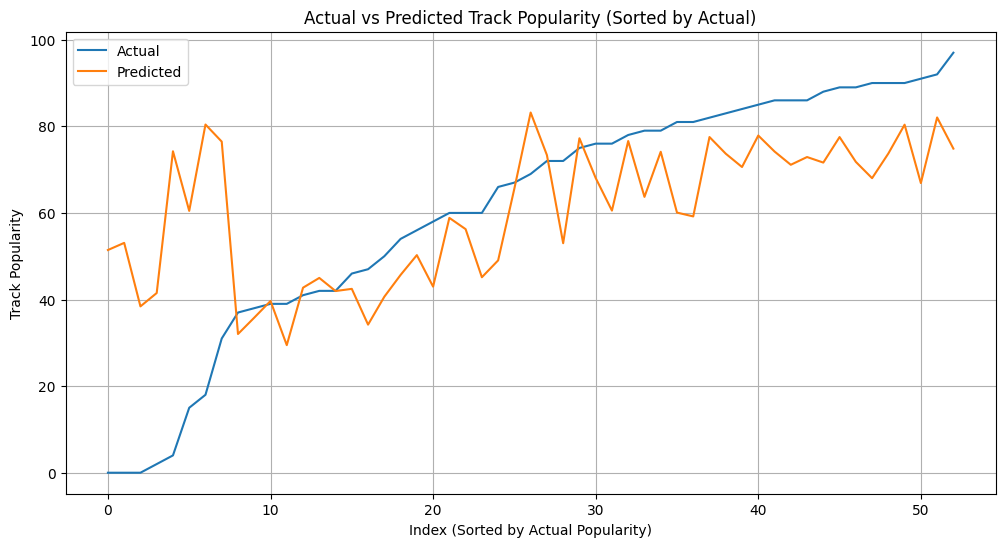

In [66]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame for easier plotting
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Sort by Actual values for a clearer line chart trend
results_df_sorted = results_df.sort_values(by='Actual').reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(results_df_sorted.index, results_df_sorted['Actual'], label='Actual')
plt.plot(results_df_sorted.index, results_df_sorted['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Track Popularity (Sorted by Actual)')
plt.xlabel('Index (Sorted by Actual Popularity)')
plt.ylabel('Track Popularity')
plt.legend()
plt.grid(True)
plt.show()

# 8. Final Conclusion

This project aimed to build a linear regression model to predict track popularity (`track_pop`) using the "TikTok Songs 2022" dataset.

Key steps undertaken include:

1.  **Data Initialization and Cleaning:** The dataset was loaded, and non-numeric features with high cardinality (`track_name`, `artist_name`, `album`) were removed as they are not suitable for linear regression and could lead to high dimensionality issues.
2.  **Descriptive Analysis and Correlation:** The data was analyzed to understand its distribution and correlations between features, especially with the target `track_pop`. The `artist_pop` feature showed the strongest positive correlation.
3.  **Feature Selection:** Based on correlation analysis and p-values from an initial model, the `artist_pop`, `duration_ms`, and `valence` features were selected as the most relevant and statistically significant predictors (although the individual significance of `duration_ms` and `valence` in the initial multivariate model was low, this combination yielded the best R² from the feature combination analysis).
4.  **Outlier Handling:** Outliers in numerical columns, particularly `track_pop` and `loudness`, were identified and handled using the IQR method to improve the quality of the training data.
5.  **Data Splitting:** The data was split into training and testing sets to train and evaluate the model.
6.  **Linear Regression Modeling:** A linear regression model was trained using the selected features.
7.  **Model Evaluation:**
    *   Evaluation on a single data split showed a negative R² on the test set, likely due to a non-representative split on a relatively small dataset.
    *   A more robust evaluation using **5-fold cross-validation** provided a more accurate performance estimate. The average R² was around 0.24, the average MAE was 14.64, and the average RMSE was 21.37. These results indicate that the linear regression model with the selected features can only explain a small portion (around 24%) of the variation in track popularity and has a significant average prediction error. The performance variation across folds also shows sensitivity to the data subset.
8.  **Prediction on New Data:** The model was used to make predictions on new random data, demonstrating how the model can be used for inference.

**Summary of Results:**

The developed linear regression model, while based on relevant features like artist popularity, duration, and valence, showed limited predictive capability on this dataset. The average R² from cross-validation of 0.24 indicates that many other factors beyond the features used influence track popularity on TikTok. **This means that while these audio features and artist popularity have some relationship with track popularity, they are not the sole drivers of virality on the platform.** The average prediction error (around 14-21 popularity points) also shows room for improvement, **suggesting that the model's predictions can deviate substantially from the actual popularity scores.** The performance variation across folds also shows sensitivity to the data subset.

**Potential Next Steps:**

*   Trying more complex regression algorithms (like Random Forest or Gradient Boosting) that can better capture non-linear relationships and feature interactions.
*   Exploring feature engineering or additional data sources that might have a stronger correlation with track popularity on TikTok.
*   Collecting more data, as a larger dataset can often improve model performance.

This project successfully identified artist popularity as the strongest predictor and demonstrated that a simple linear regression model provides a starting point, but higher performance may require more advanced modeling approaches or more predictive features.